In [1]:
# imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

plt.style.use("bmh")


2025-12-03 21:58:40.725437: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 21:58:40.750716: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Defaulting to user installation because normal site-packages is not writeable


#### loading test data for chestmnist and preprocssing

In [2]:
#loading data
chestdata = np.load("Project 3/chestmnist.npz")

X_test_chest = chestdata["test_images"]
t_test_chest = chestdata["test_labels"]

# Preprocess
X_test_chest = X_test_chest / 255.0
X_test_chest = X_test_chest[..., np.newaxis]  # shape: (N,28,28,1)

print("Chest Test:", X_test_chest.shape, t_test_chest.shape)


Chest Test: (22433, 28, 28, 1) (22433, 14)


#### loading test data for reatina and preprocssing

In [3]:
# loading dataset
retina = np.load("Project 3/retinamnist_128.npz")

X_test_retina = retina["test_images"]
t_test_retina = retina["test_labels"].flatten()

# Preprocess
X_test_retina = X_test_retina / 255.0

print("Retina Test:", X_test_retina.shape, t_test_retina.shape)


Retina Test: (400, 128, 128, 3) (400,)


#### Ldading model for chest and restina

In [4]:
# loading model
#1 — Chest Model
model_chest = keras.models.load_model("model_chest.keras")
model_chest.summary()

#Q2 — Retina Model
model_retina = keras.models.load_model("model_retina.keras")
model_retina.summary()

2025-12-03 21:58:47.656134: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17326 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:81:00.0, compute capability: 8.9
2025-12-03 21:58:47.657332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 20472 MB memory:  -> device: 1, name: NVIDIA L4, pci bus id: 0000:c1:00.0, compute capability: 8.9


Model: "Chest_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,764 (1.28 MB)

 Trainable params: 111,438 (435.30 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 222,878 (870.62 KB)

Model: "Retina_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,269,713 (4.84 MB)

 Trainable params: 422,917 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 845,836 (3.23 MB)


#### CHESTMNIST TEST EVALUATION

In [5]:
# Q1 — CHESTMNIST TEST EVALUATION


# Evaluate
test_loss, test_acc, test_auc = model_chest.evaluate(X_test_chest, t_test_chest, verbose=0)

print("\n===== CHESTMNIST TEST RESULTS =====")
print(f"Test Loss:            {test_loss:.4f}")
print(f"Test Binary Accuracy: {test_acc:.4f}")
print(f"Test AUC:             {test_auc:.4f}")


I0000 00:00:1764817128.359048 2493592 service.cc:145] XLA service 0x151f100050b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764817128.359080 2493592 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
I0000 00:00:1764817128.359082 2493592 service.cc:153]   StreamExecutor device (1): NVIDIA L4, Compute Capability 8.9
2025-12-03 21:58:48.371052: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-03 21:58:48.428712: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1764817129.975720 2493592 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



===== CHESTMNIST TEST RESULTS =====
Test Loss:            0.1638
Test Binary Accuracy: 0.9479
Test AUC:             0.7554


#### CHESTMNIST TEST Prediction and performance 

In [6]:

# Q1 — CHESTMNIST METRICS: WEIGHTED F1, WEIGHTED ACC, CONFUSION MATRIX


# 1. Raw model predictions (probabilities)
y_pred = model_chest.predict(X_test_chest)

# 2. Convert probabilities to binary predictions (threshold 0.5)
y_pred_bin = (y_pred >= 0.5).astype(int)

# 3. Weighted F1 score (flatten for multi-label)
weighted_f1 = f1_score(t_test_chest.flatten(), y_pred_bin.flatten(), average='weighted')
print(f"Weighted F1 Score: {weighted_f1:.4f}")

# 4. Weighted Accuracy
weighted_acc = accuracy_score(t_test_chest.flatten(), y_pred_bin.flatten())
print(f"Weighted Accuracy: {weighted_acc:.4f}")




702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step
Weighted F1 Score: 0.9265
Weighted Accuracy: 0.9479


#### Confusion metrics on CHESTMNIST TEST

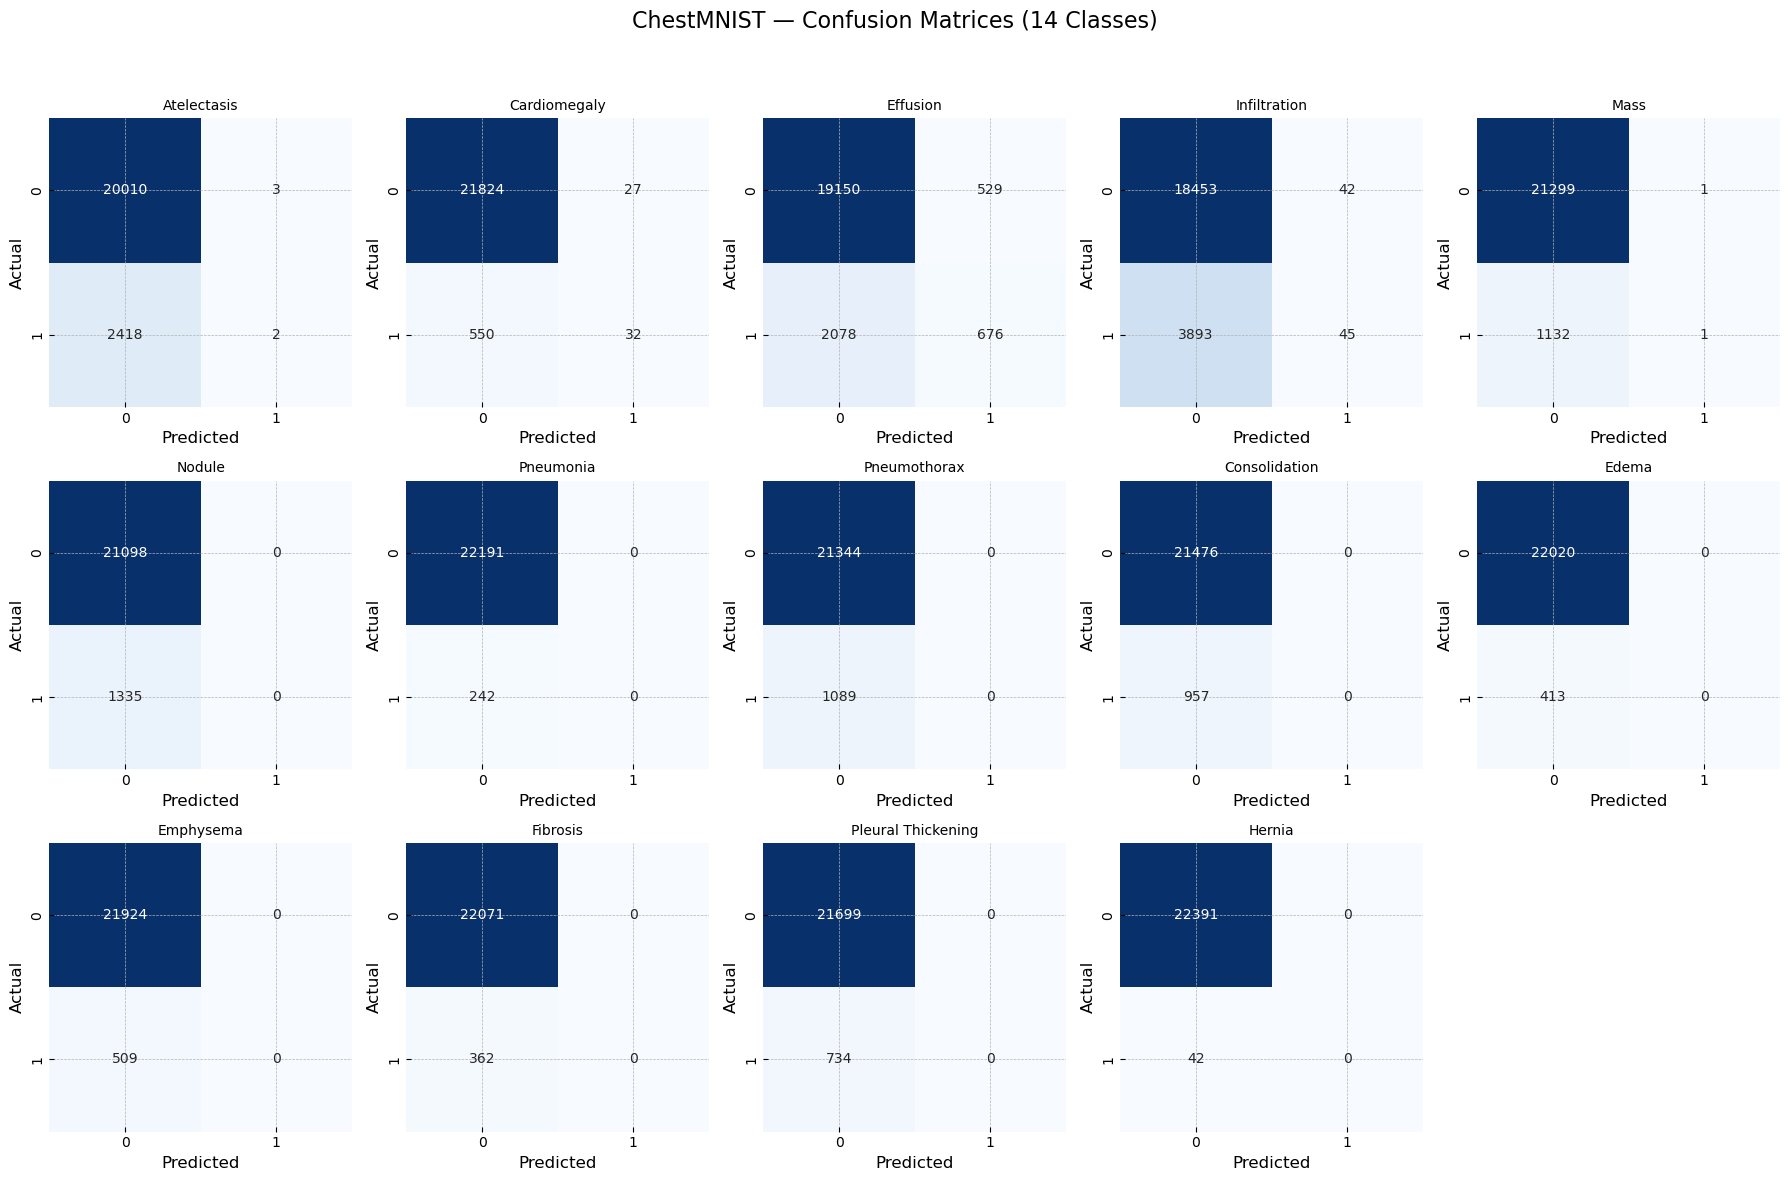

In [7]:
# ChestMNIST class names
chest_classes = [
    'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass',
    'Nodule', 'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema',
    'Emphysema', 'Fibrosis', 'Pleural Thickening', 'Hernia'
]

# 3 rows, 5 columns → 15 grid slots
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
axes = axes.flatten()

for i in range(15):

    ax = axes[i]

    if i < 14:
        # Compute confusion matrix for class i
        cm = confusion_matrix(t_test_chest[:, i], y_pred_bin[:, i])

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(chest_classes[i], fontsize=10)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    else:
        # Leave last cell empty
        ax.axis("off")

plt.suptitle("ChestMNIST — Confusion Matrices (14 Classes)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [8]:
import pandas as pd

# Prepare lists to store values
results = {
    "Class": [],
    "TN": [],
    "FP": [],
    "FN": [],
    "TP": []
}

for i in range(14):
    cm = confusion_matrix(t_test_chest[:, i], y_pred_bin[:, i])

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]

    results["Class"].append(chest_classes[i])
    results["TN"].append(tn)
    results["FP"].append(fp)
    results["FN"].append(fn)
    results["TP"].append(tp)

# Convert to DataFrame
cm_table = pd.DataFrame(results)

# Display
print("\n=== ChestMNIST TP / FP / FN / TN Table ===")
cm_table



=== ChestMNIST TP / FP / FN / TN Table ===


,Class,TN,FP,FN,TP
0,Atelectasis,20010,3,2418,2
1,Cardiomegaly,21824,27,550,32
2,Effusion,19150,529,2078,676
3,Infiltration,18453,42,3893,45
4,Mass,21299,1,1132,1
5,Nodule,21098,0,1335,0
6,Pneumonia,22191,0,242,0
7,Pneumothorax,21344,0,1089,0
8,Consolidation,21476,0,957,0
9,Edema,22020,0,413,0


#### Classification report CHESTMNIST TEST

In [9]:
from sklearn.metrics import classification_report

print("\n=== ChestMNIST Classification Report (Per Class) ===")
print(classification_report(t_test_chest, y_pred_bin, target_names=chest_classes))



=== ChestMNIST Classification Report (Per Class) ===
                    precision    recall  f1-score   support

       Atelectasis       0.40      0.00      0.00      2420
      Cardiomegaly       0.54      0.05      0.10       582
          Effusion       0.56      0.25      0.34      2754
      Infiltration       0.52      0.01      0.02      3938
              Mass       0.50      0.00      0.00      1133
            Nodule       0.00      0.00      0.00      1335
         Pneumonia       0.00      0.00      0.00       242
      Pneumothorax       0.00      0.00      0.00      1089
     Consolidation       0.00      0.00      0.00       957
             Edema       0.00      0.00      0.00       413
         Emphysema       0.00      0.00      0.00       509
          Fibrosis       0.00      0.00      0.00       362
Pleural Thickening       0.00      0.00      0.00       734
            Hernia       0.00      0.00      0.00        42

         micro avg       0.56      0.05     

/apps/tensorflow/2.16.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/apps/tensorflow/2.16.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/apps/tensorflow/2.16.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/apps/tensorflow/2

#### Learning curve

In [10]:
import pickle

# Load saved training history
with open("history_chest.pkl", "rb") as f:
    hist_chest = pickle.load(f)

print(hist_chest.keys())


dict_keys(['auc', 'binary_accuracy', 'loss', 'val_auc', 'val_binary_accuracy', 'val_loss', 'learning_rate'])


In [11]:
import matplotlib.pyplot as plt

def plot_learning_curves(history_dict, title_prefix="ChestMNIST"):
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(18, 4))

    # 1. LOSS CURVE
    
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history_dict['loss'], label="Train Loss")
    plt.plot(epochs, history_dict['val_loss'], label="Val Loss")
    plt.title(f"{title_prefix} — Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Binary Crossentropy Loss")
    plt.legend()


    # 2. BINARY ACCURACY CURVE

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history_dict['binary_accuracy'], label="Train Accuracy")
    plt.plot(epochs, history_dict['val_binary_accuracy'], label="Val Accuracy")
    plt.title(f"{title_prefix} — Binary Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()


    # 3. AUC CURVE

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history_dict['auc'], label="Train AUC")
    plt.plot(epochs, history_dict['val_auc'], label="Val AUC")
    plt.title(f"{title_prefix} — AUC Curve")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()

    plt.tight_layout()
    plt.show()


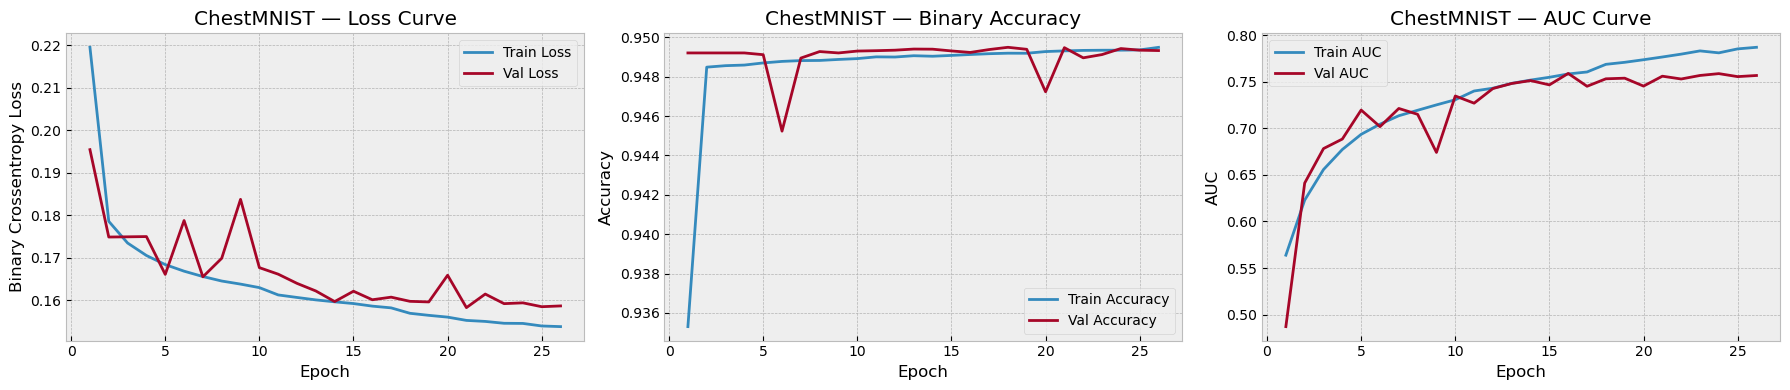

In [12]:
plot_learning_curves(hist_chest, "ChestMNIST")


#### Retina Dataset

#### Evaluate Retina Model on Test Data

In [13]:

# RetinaMNIST — Test Evaluation


test_loss_r, test_acc_r, test_auc_r = model_retina.evaluate(
    X_test_retina, 
    keras.utils.to_categorical(t_test_retina, num_classes=5), 
    verbose=0
)

print("\n===== RETINAMNIST TEST RESULTS =====")
print(f"Test Loss:      {test_loss_r:.4f}")
print(f"Test Accuracy:  {test_acc_r:.4f}")
print(f"Test AUC:       {test_auc_r:.4f}")



===== RETINAMNIST TEST RESULTS =====
Test Loss:      1.2226
Test Accuracy:  0.5550
Test AUC:       0.7395


In [14]:


# Predictions


y_pred_probs_r = model_retina.predict(X_test_retina)
y_pred_r = np.argmax(y_pred_probs_r, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


#### Weighted Accuracy & Weighted F1 Score

In [15]:
# Weighted Accuracy & Weighted F1 Score
from sklearn.metrics import f1_score, accuracy_score

weighted_acc_r = accuracy_score(t_test_retina, y_pred_r)
weighted_f1_r  = f1_score(t_test_retina, y_pred_r, average="weighted")

print(f"Weighted Accuracy: {weighted_acc_r:.4f}")
print(f"Weighted F1 Score: {weighted_f1_r:.4f}")

Weighted Accuracy: 0.5550
Weighted F1 Score: 0.5248


#### Condusion matrix - Retina

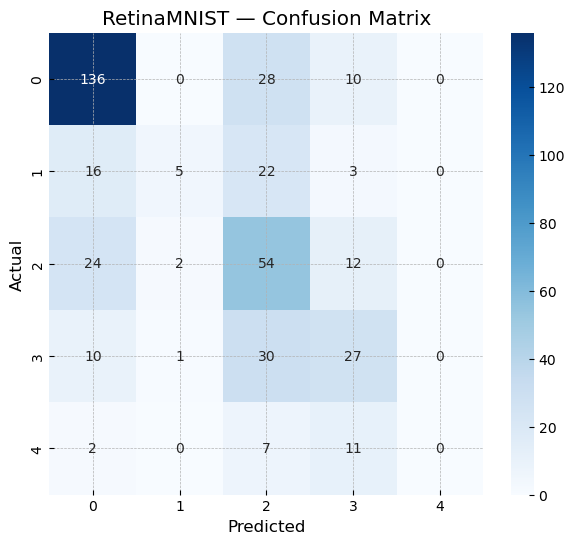

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_r = confusion_matrix(t_test_retina, y_pred_r)

plt.figure(figsize=(7,6))
sns.heatmap(cm_r, annot=True, fmt="d", cmap="Blues")
plt.title("RetinaMNIST — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Classification Report

In [17]:
from sklearn.metrics import classification_report

retina_classes = ["Class0", "Class1", "Class2", "Class3", "Class4"]

print("\n=== RetinaMNIST Classification Report ===")
print(classification_report(t_test_retina, y_pred_r, target_names=retina_classes))



=== RetinaMNIST Classification Report ===
              precision    recall  f1-score   support

      Class0       0.72      0.78      0.75       174
      Class1       0.62      0.11      0.19        46
      Class2       0.38      0.59      0.46        92
      Class3       0.43      0.40      0.41        68
      Class4       0.00      0.00      0.00        20

    accuracy                           0.56       400
   macro avg       0.43      0.37      0.36       400
weighted avg       0.55      0.56      0.52       400



/apps/tensorflow/2.16.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/apps/tensorflow/2.16.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/apps/tensorflow/2.16.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Load Retina history
with open("history_retina.pkl", "rb") as f:
    hist_retina = pickle.load(f)

print("Retina History Keys:", hist_retina.keys())



Retina History Keys: dict_keys(['accuracy', 'auc', 'loss', 'val_accuracy', 'val_auc', 'val_loss', 'learning_rate'])


In [19]:
def plot_learning_curves_retina(history_dict, title_prefix="RetinaMNIST"):
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(18, 4))

    # 1. LOSS CURVE
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history_dict['loss'], label="Train Loss")
    plt.plot(epochs, history_dict['val_loss'], label="Val Loss")
    plt.title(f"{title_prefix} — Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Categorical Crossentropy Loss")
    plt.legend()

    # 2. ACCURACY CURVE (NOT binary accuracy)
    plt.subplot(1, 3, 2)
    plt.plot(epochs, history_dict['accuracy'], label="Train Accuracy")
    plt.plot(epochs, history_dict['val_accuracy'], label="Val Accuracy")
    plt.title(f"{title_prefix} — Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # 3. AUC CURVE
    plt.subplot(1, 3, 3)
    plt.plot(epochs, history_dict['auc'], label="Train AUC")
    plt.plot(epochs, history_dict['val_auc'], label="Val AUC")
    plt.title(f"{title_prefix} — AUC Curve")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()

    plt.tight_layout()
    plt.show()


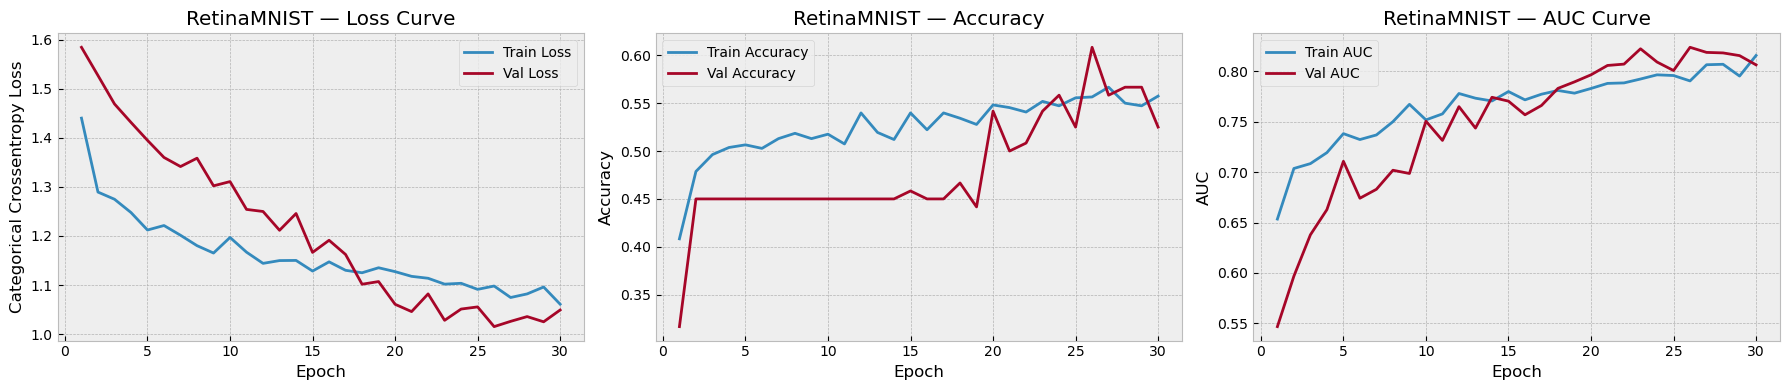

In [20]:
plot_learning_curves_retina(hist_retina, "RetinaMNIST")
